  # Schließende Statistik mit Python
  
  
 Prof. Stefan Rist

Die schießende Statistik versucht aus beobachteten Daten (in der Regel Stichproben) Schlüsse auf die Grundgesamtheit zu ziehen.  Ein typisches Beispiel sind Wahlumfragen oder Marktanalysen. Ein Teil der Bevölkerung oder möglichen 
Kunden wird mittels eines Fragebogens zu bestimmten Themen befragt und aus den Antworten der Teilnehmer versucht der
Data-Analyst das Wahl- bzw. Kaufverhalten der gesamten Bevölkerung zu analysieren. 

In diesem Notebook werden wir lernen wie wir bestimmte Aussagen anhand von Stichproben treffen können. 

Als erstes laden wir die benötigten Bibliotheken

In [1]:
import numpy as np # enthält viele mathematische Funktionen
import pandas as pd
import matplotlib.pyplot as plt   # zum erstellen von Graphen

import random as rand


plt.rcParams["figure.figsize"]=4,3 #Größe aller Bilder in diesem Notebook


## Wahrscheinlichkeitsverteilungen 

Die Wahscheinlichkeitsdichte, die Kummulierte Wahrscheinlichkeit und die Quantile können wir mit dem scipy.stats Paket recht einfach berechnen. 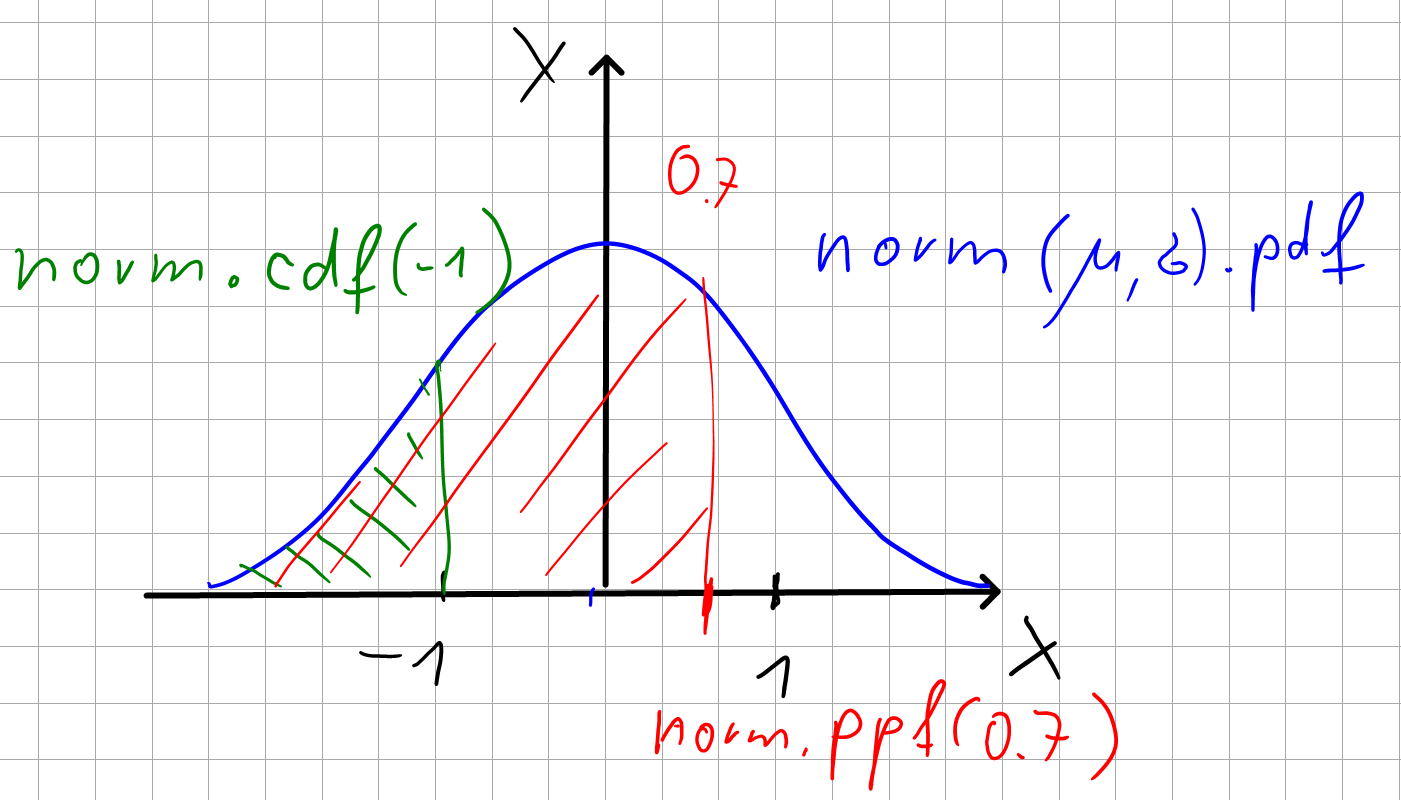

### Die Normalverteilung


Die Zufallsvariable $X$~$N(\mu,\sigma)$ heißt Normalverteilt mit Mittelwert $\mu$ und Standardabweichung $\sigma$ wenn X  die folgende Dichtefunktion hat:

$$ f(X) = \frac{1}{\sqrt{2\pi}\sigma}\, e^{-\frac{(X-\mu)^2}{2\sigma^2}} $$

Es ist gilt für Erwartungswert $E[X]=\mu$ und Varianz $Var[X]=\sigma^2$.

Darstellen und berechnen können wir die Normalverteilung mit der scipy.stats.norm Funkion

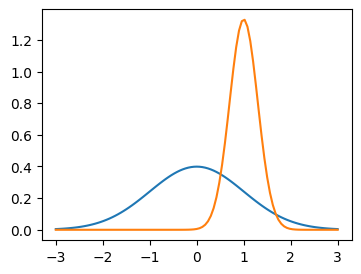

In [2]:
from scipy.stats import norm # Importieren der Normalverteilung

#Wahrscheinlichkeitsdichte
x = np.linspace(-3,3,101)
y1 = norm.pdf(x)
y2 = norm(1,0.3).pdf(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [3]:
#Wahrscheinlichkeit
print(norm.cdf(-1))   
print(norm(0,1).cdf(-1)) #Mittelwert und Standardab. explizit angegeben

#Quantile
print(norm.ppf(0.7)) #Percent point function (inverse of `cdf`) at q of the given RV.

0.15865525393145707
0.15865525393145707
0.5244005127080407


**Beispiel Regen in Mannheim**

Die Niederschlagsmenge in Mannheim sei normalverteilt mit Mittelwert 660 mm/m^2 und Standardabweichung 140mm/m^2.\
Wie groß ist die Wahrscheinlichkeit, dass es weniger als 300 mm/m^2 im nächsten Jahr regnen wird?

In [4]:
#Lsg
menge = None
print('Wkt für weniger als 300mm/m^2 Regen:', menge) 

Wkt für weniger als 300mm/m^2 Regen: None


So wie bei der Normalverteilung können wir die entsprechenden Werte für beliebige Wahrscheinlichkeitsverteilungen berechnen:

### Die Chi-Quadrat Verteilung

Es seien $Z_1, Z_2, \dots Z_n$ n Standardnormalverteilte Zufallsvariablen, dann ist die Zufallsvariable

$$X = Z_1^2 + Z_2^2 + \dots Z_n^2  $$

Chi-Quadrat verteilt mit n Freiheitsgraden. Man schreibt

$$ X\sim  \chi^2_n$$

Es gilt $E[X]=n$ für den Mittelwert (Erwartungswert) und $Var[X] = 2n$ für die Varianz. Für eine große Anzahl an Freiheitsgraden $n\gg 1$ geht die Chi-Quadrat Verteilung in eine Normalverteilung über $\chi^2_n \sim N(n,\sqrt{2n}), \,\ n\gg 1$

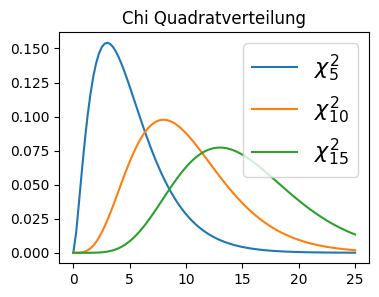

In [5]:
from scipy.stats import chi2 # Importieren der Chi Quadratverteilung

#Wahrscheinlichkeitsdichte
x = np.linspace(0,25,100)
y1 = chi2(5).pdf(x)
y2 = chi2(10).pdf(x)
y3 = chi2(15).pdf(x)
plt.plot(x,y1,label = '$\chi^2_5$')
plt.plot(x,y2,label = '$\chi^2_{10}$')
plt.plot(x,y3,label = '$\chi^2_{15}$')
plt.legend(prop={'size': 16})
plt.title('Chi Quadratverteilung')
plt.show()

Wir sehen wie die Chi-Quadrat Verteilung für mehr Freiheitsgrade $n\gg 1$ immer Gaussförmiger wird und sich einer Normalverteilung mit Mittelwert $2n$ annähert.

In [6]:
#Wahrscheinlichkeit
print(chi2(5).cdf(5))  

#Quantile
print(chi2(5).ppf(0.9)) #Percent point function (inverse of `cdf`) at q of the given RV.

0.584119813004492
9.236356899781123


### Die Binomialverteilung

Es seien $X_j$ mit $j = 1\dots n$ n- unabhängige Bernoulli-Zufallsvariablen (Nur 2 Ausgänge, Kopf oder Zahl) mit 
\begin{eqnarray}
P(X_j=1) &=& p \\
P(X_j=0) &=& 1-p
\end{eqnarray}
Dann ist die Zufallsvariable
$$X = X_1 + X_2 + \dots X_n $$

Eine Binomialverteilte Zufallsvariable mit der Wahrscheinlichkeitsdichte

$$P(X=k) = \left ( \begin{array}{c} N \\ k \end{array} \right ) p^k (1-p)^{N-k} $$

Die Zufallsvariable $X$ gibt die Wahrscheinlichkeit für $k$-Erfolge bei $N$-Versuchen an, wenn die Einzel-Wahrscheinlichkeit für einen Erfolg $p$ beträgt.

Für Mittelwert und Varianz gilt
\begin{eqnarray}
X[X] &=& N\cdot p \\
Var[X] &=& N\cdot p\cdot(1-p)
\end{eqnarray}

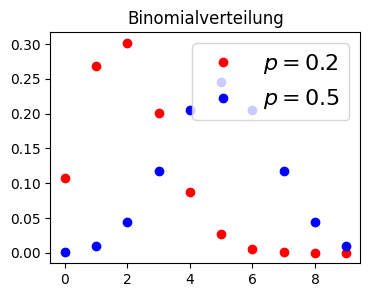

In [7]:
from scipy.stats import binom  # Importieren der Binomialverteilung

#Wahrscheinlichkeitsdichte
k = np.arange(0,10)
y1 = binom(10,0.2).pmf(k)
y2 = binom(10,0.5).pmf(k)
plt.plot(k,y1,'ro',label = '$p=0.2$')
plt.plot(k,y2,'bo',label = '$p=0.5$')
plt.legend(prop={'size': 16})
plt.title('Binomialverteilung')
plt.show()


In [8]:
#Wahrscheinlichkeit
print(binom(10,0.5).pmf(2)) #Einzelwahrscheinlichkeit
print(binom(10,0.5).cdf(2.5))   # Kummuliert Bei diskreten Verteilungen am besten immer .5 Zahlen verwenden

#Quantile
print(binom(10,0.5).ppf(0.7)) #Percent point function (inverse of `cdf`) at q of the given RV.

#check 70% Quantil
print(binom(10,0.5).cdf(5.5)) 
print(binom(10,0.5).cdf(6.5)) 


0.04394531250000004
0.0546875
6.0
0.623046875
0.828125


**Übunge** \
In einer Serienfertigung werden 3% der Produkte fehlerhaft produziert. 
- Wie groß ist die Wahrscheinlichkeit, dass genau 2 fehlerhafte Produkte in der Stichprobe sind?
- Wie groß ist die Wahrscheinlichkeit, dass in einer Stichprobe von 50 mehr als 3 fehlerhafte Produkte sind?
- Angenommen wir wollen mit unserer Qualitätssicherung überprüfen ob die Quote der fehlerhaften Produkte tatsächlich nur 3% beträgt. Ab wieviel fehlerhaften Produkten in unserer Stichprobe müssen wir Alarm geben, wenn wir uns zu 99% sicher sein wollen, dass p=0.03 nicht stimmt?

In [20]:
p = 0.03
n = 50


### Die Student t Verteilung

Aus dem zentralen Grenzwertsatz folgt, dass der Stichprobenmittelwert normalverteilt ist
$$ \bar{x} \sim N(\mu,\sigma) $$
Wobei $\mu$ der echte Erwartungswert und $\sigma$ die echte Standardabweichung sind.
In der Regel schätzen wir sowohl den Erwartungswert als auch die Standardabweichung aus unserer Stichprobe. Durch das Schätzen der Standardabweichung erhält man eine zusätzliche Unsicherheit. Man kann zeigen, dass für eine **normalverteilte Grundgesamtheit** in diesem Fall gilt:
$$ \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} \sim t_{n-1}$$
wobei $s$ die Standardabweichung der Stichprobe von Umfang $n$ ist und $t_{n-1}$ die Student-T Verteilung mit $n-1$ Freiheitsgraden.

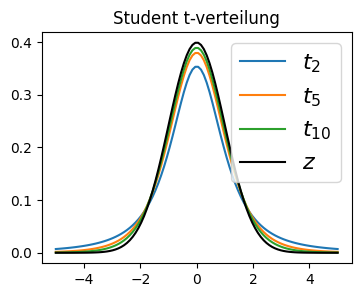

In [10]:
from scipy.stats import t

#Wahrscheinlichkeitsdichte
x = np.linspace(-5,5,100)
y1 = t(2).pdf(x)
y2 = t(5).pdf(x)
y3 = t(10).pdf(x)
plt.plot(x,y1,label = '$t_2$')
plt.plot(x,y2,label = '$t_{5}$')
plt.plot(x,y3,label = '$t_{10}$')
plt.plot(x,norm.pdf(x),color = 'k',label = '$z$')
plt.legend(prop={'size': 16})
plt.title('Student t-verteilung')
plt.show()

Wir sehen, für größere Stichproben wir die Student t Verteilung der Normalverteilung immer ähnlicher. In der Tat gilt:
$$ \lim_{n\to\infty} t_n = z $$
Wobei $z$ die Standardnormalverteilung ist.

### Beispiel Regen in Mannheim Teil 2

Die Niederschlagsmenge ($mm/m^2$) in Mannheim im Juli in den letzten Jahren betrug http://archiv.mannheim-wetter.info/niederschlag.shtml

(184,44,139,47,104,78,73,102,44,105,39,116,54,14,123,42,68,78,42,51)

Eine Versicherungsgesellschaft für Landwirte möchte Abschätzen wie wahrscheinlich es ist, dass es weniger als
$10 mm/m^2$ oder mehr als $200 mm/m^2$ regnet, da in beiden Fällen Ernteausfälle zu erwarten sind.  
Wir gehen davon aus, dass die Grundgesamtheit normalverteilt ist und schätzen für deren 
Mittelwert $\mu = \bar{x}$ und Standardabweichung $\sigma = s$. 

Bestimmen Sie die Wahrscheinlichkeit für einen Ernteausfall mit der Normalverteilung und der t-Verteilung:

In [25]:
#Bestimmen von Mittelwert und Standardabweichung der gegebenen Niederschlagsmenge
X = np.array([184,44,139,47,104,78,73,102,44,105,39,116,54,14,123,42,68,78,42,51])
Xbar = None
S = None # Ohne ddof = 1 Wird std mit Faktor 1/N berechnet und nicht 1/(N-1)

print('Mittelwert:',Xbar,'Standardabweichung:',S)

#Berechnen Sie mit Hilfe der Funktion norm.cdf die gefragte Wkt.

#help(norm.cdf)
p_groesser = 0
p_kleiner = 0
p_gesamt = p_groesser + p_kleiner
print('Wkt. zuviel Regen [%]',round(p_groesser*100,2),'Wkt. zu wenig Regen [%]'
      ,round(p_kleiner*100,2),'Wkt. Ernteausfall [%]',round(p_gesamt*100,2))



Mittelwert: None Standardabweichung: None
Wkt. zuviel Regen [%] 0 Wkt. zu wenig Regen [%] 0 Wkt. Ernteausfall [%] 0


Wie in der Vorlesung besprochen wollen wir jetzt noch einmal die Wahrscheinlichkeit mit Hilfe der Student'schen t-Verteilung berechnen

In [26]:
#Berechnen Sie mit Hilfe der Funktion t.cdf die gefragte Wkt.
N = len(X)

#help(t)
p_groesser = 0
p_kleiner = 0
p_gesamt = p_groesser + p_kleiner
print('Wkt. zuviel Regen [%]',round(p_groesser*100,2),'Wkt. zu wenig Regen [%]'
      ,round(p_kleiner*100,2),'Wkt. Ernteausfall [%]',round(p_gesamt*100,2))


Wkt. zuviel Regen [%] 0 Wkt. zu wenig Regen [%] 0 Wkt. Ernteausfall [%] 0


Wir sehen, ein Prozent Unterschied kann bei der Berechnung einer Versicherungsquote durchaus einen großen Unterschied machen!

Der Unterschied zwischen der t-Verteilung und der Normalverteilung macht sich besonders an den Enden der Verteilung, also bei seltenen Ereignissen bemerkbar!


## Konfidenzintervalle

Es sei $T$ ein Schätzer für $\Delta$. Für das Vertrauensintervall 
$$  I_{1-\alpha}(T)$$ gilt, 
$$P(\Delta \in I_{1-\alpha}(T)) \ge 1-\alpha $$
In Worten: \
Die Wahrscheinlichkeit, dass das durch Schätzung von $T$ bestimmte Vertrauensintervall den echten Wert $\Delta$ enthält ist größer als $1-\alpha$

Es sei $\mu$ und $\sigma$ Mittelwert und Standardabweichung der Grundgesamtheit und $\bar{x}$, $s$ Stichprobenmittelwert und Stichprobenstandardabweichung. \
Aus der Verteilung des Mittelwertes folgt für dessen zweiseitiges Vertrauensintervall:
$$ I_{1-\alpha} (\bar{x}) = \bar{x} \pm \frac{\sigma}{\sqrt{n}} z_{\alpha/2} \hspace{1cm}\text{falls $\sigma$ bekannt}$$

$$ I_{1-\alpha} (\bar{x}) = \bar{x} \pm \frac{s}{\sqrt{n}} t_{\alpha/2} \hspace{1cm}\text{falls $\sigma$ unbekannt}$$

Für das einseitige Vertrauelsintervall muss wie in der Skizze gezeigt $z_{\alpha/2} \rightarrow z_\alpha$ bzw. $t_{\alpha/2} \rightarrow t_\alpha$  ersetzt werden.

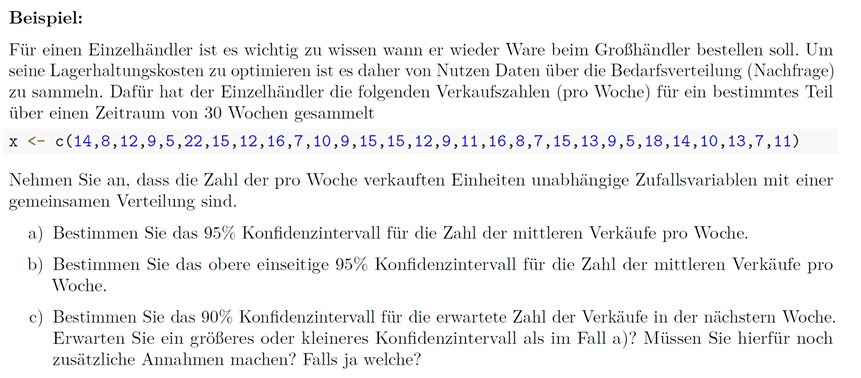

Hinweis einseitiges Vertrauensintervall
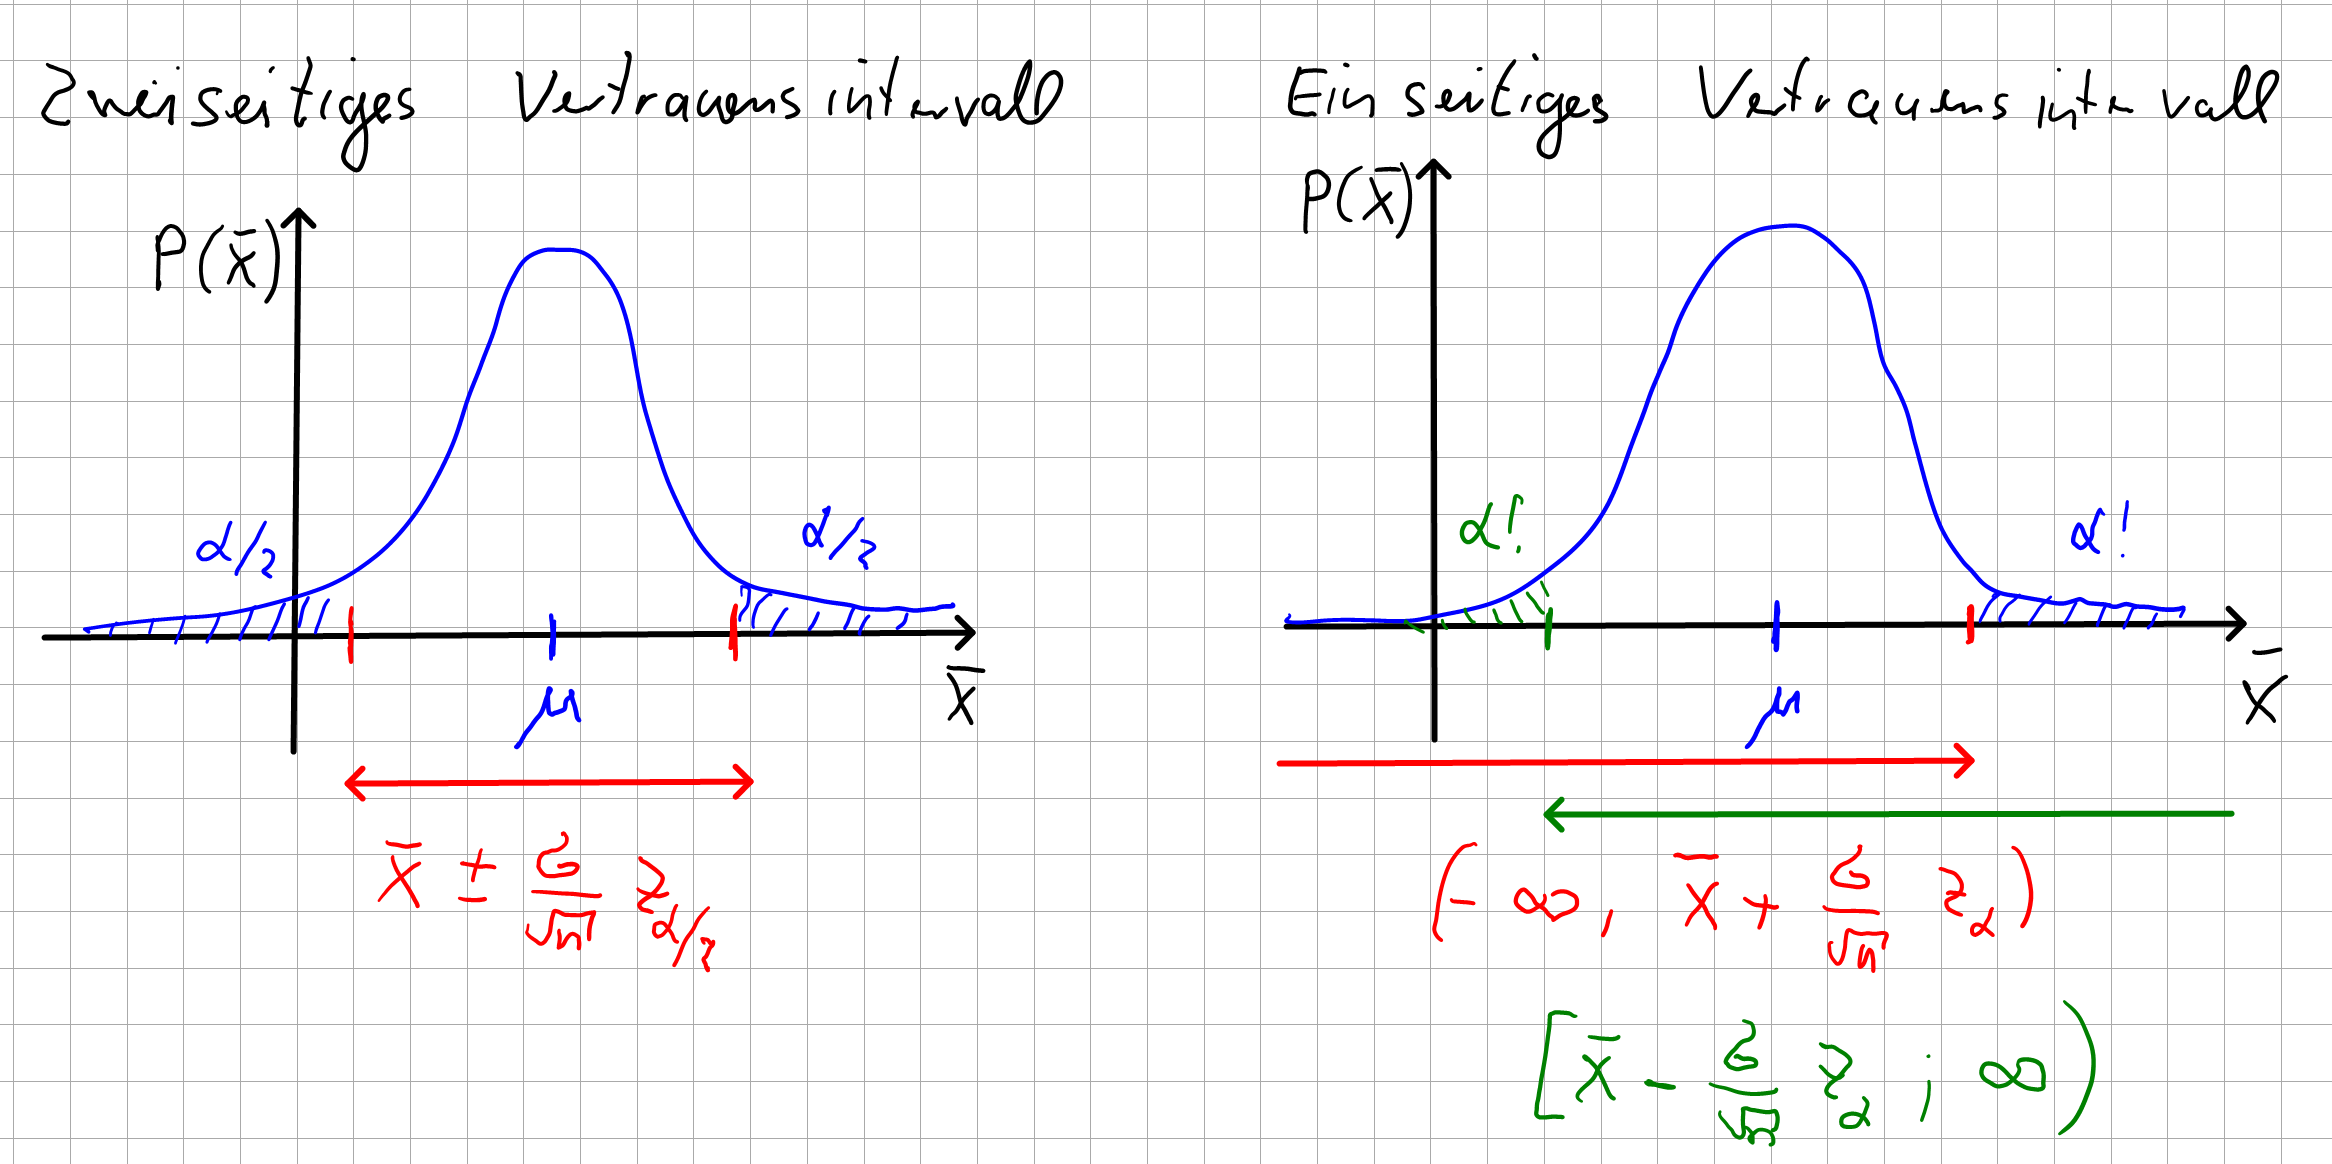

In [27]:
# Stichprobenwerte
x = np.array([14,8,12,9,5,22,15,12,16,7,10,9,15,15,12,9,11,16,8,7,15,13,9,5,18,14,10,13,7,11])
n = len(x)
xbar = 0
s = 0
alpha = 0.05

# Wir gehen von einer Normalverteilten Grundgesamtheit aus

#Zweiseitiges Konfidenzintervall
I_lower = 0
I_upper = 0
print('Mit 95% Wkt liegt die mittlere Verkaufszahl im Bereich [',np.round(I_lower,2),',',np.round(I_upper,2),']')


#Einseitiges Konfidenzintervall
I_lower = 0
print('Mit 95% Wkt übersteigt die mittlere Verkaufszahl den Wert ',np.round(I_lower,2))

#Zweiseitiges Konfidenzintervall für Einzelmessung!
alpha = 0.1
I_lower = 0
I_upper = 0
print('Mit 90% Wkt liegt die Verkaufszahl nächste Woche im Bereich [',np.round(I_lower,2),',',np.round(I_upper,2),']')

# Streng genommen gilt die Schätzung für die Einzelmessung nur, wenn die Grundgesamtheit Normalverteilt und 
# die Stichprobe groß genug (>20) ist


Mit 95% Wkt liegt die mittlere Verkaufszahl im Bereich [ 0 , 0 ]
Mit 95% Wkt übersteigt die mittlere Verkaufszahl den Wert  0
Mit 90% Wkt liegt die Verkaufszahl nächste Woche im Bereich [ 0 , 0 ]


!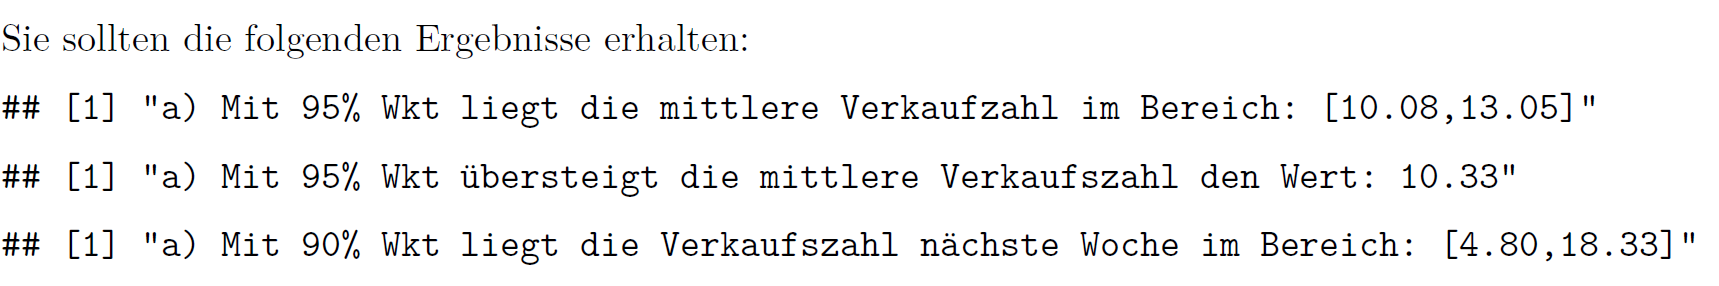

### Bootstrap
An diesem Beispiel wollen wir noch das Bootstrap Verfahren veranschaulichen. Der große Vorteil ist, das wir keinerlei Annahmen über die Verteilung der Grundgesamtheit treffen müssen

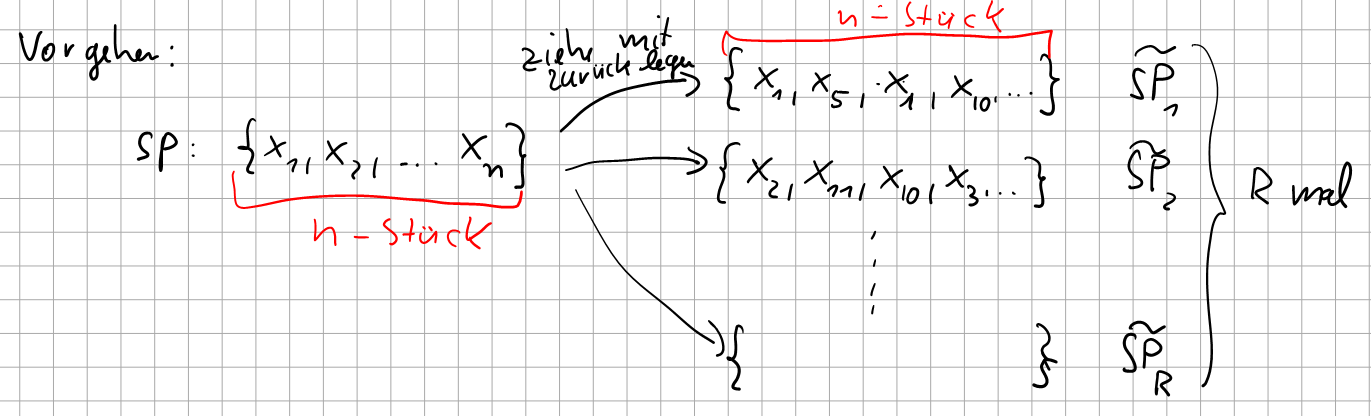

In [14]:
# Permutation Funktion für den Unterschied der Mittelwerte
def perm_fun_mean(x): 
    # INPUT
    # x Stichprobe
    # OUTPUT
    # Mittelwert der simulierten Stichprobe
    
    x_sim = np.random.choice(x,len(x))
    return np.mean(x_sim)

R = 5 #Anzahl der simulierten Stichproben

Svec = [perm_fun_mean(x) for _ in range(R)] #führe die Simulation R mal aus
display(Svec)


[10.2, 11.7, 11.3, 11.233333333333333, 11.266666666666667]

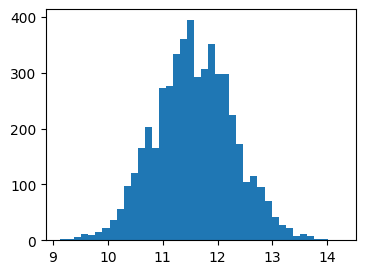

In [15]:
R = 5000 #Anzahl der simulierten Stichproben
Svec = np.array([perm_fun_mean(x) for _ in range(R)] )

plt.hist(Svec,bins = 40);

In [16]:
# Berechnen von Wahrscheinlichkeiten:
#Wkt, dass die mittlere Verkaufszahl im nächsten Jahr über 13 liegt:
anz = 13
p_sim = np.sum(Svec > anz)/len(Svec)
print('Wkt. aus Simulation, mittlere Verkaufszahl >',anz,':',p_sim)

#mit t-Verteilung
lim = (anz-xbar)/(s/np.sqrt(n))
p_t = 1-t(n-1).cdf(lim)
print('Wkt. aus t-Verteilung, mittlere Verkaufszahl >',anz,':',p_t)


Wkt. aus Simulation, mittlere Verkaufszahl > 13 : 0.0222
Wkt. aus t-Verteilung, mittlere Verkaufszahl > 13 : 0.02907463334446414


Um die Fragen der Aufgabenstellung beantworten zu können benötigen wir allerdings die Quantile der simulierten Verteilung. Dazu müssen wir noch ein wenig Arbeit leisten

In [17]:
# quantile
counts, bin_edges = np.histogram(Svec, bins=3) #Finde Höhe und Lage der Balken im Histogramm

print(counts)
print(bin_edges)

c1 = np.hstack([0,counts])
c2 = np.hstack([counts,0])
counts_centered = (c1+c2)/2 #zentrierte Höhe der Balken
print(counts_centered) 

#Generiere die Empirische Verteilungsfunktion
print(np.cumsum(counts_centered))

[ 810 3749  441]
[ 9.13333333 10.84444444 12.55555556 14.26666667]
[ 405.  2279.5 2095.   220.5]
[ 405.  2684.5 4779.5 5000. ]


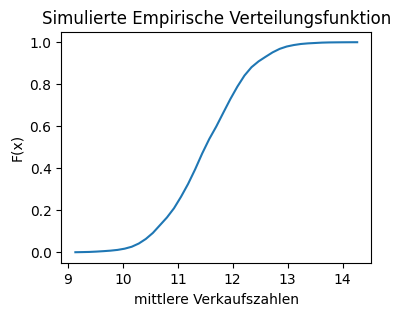

In [18]:
#jetzt das Ganze mit der nötigen Auflösung und als Funktion

def make_V(means,nx):
    #INPUT
    # Liste mit Mittelwerten
    # nx Wieviele x Stützstellen (bins im Histogramm)

    counts, bin_edges = np.histogram(means, bins=nx) #Finde Höhe und Lage der Balken im Histogramm
    c1 = np.hstack([0,counts])
    c2 = np.hstack([counts,0])
    counts_centered = (c1+c2)/2 #zentrierte Höhe der Balken
    
    x = bin_edges #x-Stützstellen
    Vx = np.cumsum(counts_centered)/np.sum(counts_centered) #Verteilungsfunktion
    
    return(x,Vx)
    

#Generiere die Empirische Verteilungsfunktion
x_plot,Fx = make_V(Svec,nx=40)

plt.plot(x_plot,Fx);
plt.title('Simulierte Empirische Verteilungsfunktion')
plt.xlabel('mittlere Verkaufszahlen')
plt.ylabel('F(x)')
plt.show()

In [19]:
# beidseitiges 95% Konfidenzintervall
alpha = 0.05
ind_lower = np.argmin(np.abs(Fx-alpha/2))
ind_upper = np.argmin(np.abs(Fx-(1-alpha/2)))
print('Mit',(1-alpha)*100,'% Wkt liegen die mittleren Verkaufszahlen im Intervall: [',
      x_plot[ind_lower],',',x_plot[ind_upper],']')

# einseitiges 95% Konfidenzintervall
ind_lower2 = np.argmin(np.abs(Fx-alpha))
print('Mit',(1-alpha)*100,'% Wkt liegen die mittleren Verkaufszahlen im Intervall: [',
      x_plot[ind_lower2],',infty]')

Mit 95.0 % Wkt liegen die mittleren Verkaufszahlen im Intervall: [ 10.16 , 12.983333333333334 ]
Mit 95.0 % Wkt liegen die mittleren Verkaufszahlen im Intervall: [ 10.288333333333334 ,infty]


Überlegen Sie sich was man ändern müsste um auch noch die 3te Frage mit Hilfe einer Simulation beantworten zu können